open
---------

## 문서 목적

- intermediate python study에서 open 함수 발표(약 20분)를 위해 작성되었습니다.
- 이 문서는 python open에 대한 기본적인 내용을 안내합니다.
- python version : 3.6
- 발표 날짜 : 2019/06/08

## 참고 자료

- [python 공식 문서 - open](https://docs.python.org/ko/3/library/functions.html#open)
- [중급 파이썬](https://ddanggle.gitbooks.io/interpy-kr/content/ch20-open-function.html)
- [파이썬 - 기본을 갈고 닦자](https://wikidocs.net/16077)
- [데이터사이언스스쿨 - 파이썬의 파일 입출력](https://datascienceschool.net/view-notebook/bf8582817a714aec944070cf4b3d94ec/)
- [데이터사이언스스쿨 - 파이썬으 문자열 인코딩](https://datascienceschool.net/view-notebook/250c1869eab54157827adf54c5e9f064/)
- [파이썬 파일 읽기, 쓰기](https://thrillfighter.tistory.com/310)
- [파이썬 한글 인코딩(UTF-8, Unicode, Euc-Kr) 탐구)](https://redscreen.tistory.com/163)
- [파이썬 파일 사용법 정리](https://withcoding.com/86)
- [예제로 배우는 python 프로그래밍](http://pythonstudy.xyz/python/article/206-%ED%8C%8C%EC%9D%BC-%EB%8D%B0%EC%9D%B4%ED%83%80-%EC%B2%98%EB%A6%AC)

---------------------------------

## open?

python에서 파일을 열 때 사용하는 함수 입니다.
- 기본 내장 함수
- file을 열고 [<span style="color:red">파일 객체</span>](https://docs.python.org/ko/3/glossary.html#term-file-object)를 돌려 줍니다.
  - open 함수의 반환값은 파일 객체,핸들이며 운영체제에서 파이썬으로 전달됩니다. 
  - 파일 작업이 끝나면 파일 핸들을 반환해야 하는데 반환을 해야 한번에 열 수 있는 파일 핸들의 한도에 도달하지 않습니다.
  - close()가 호출 되어야 파일이 닫힙니다. 중간에 에러가 발생하면 닫히지 않습니다.
  - 파일을 닫지 않으면 버퍼링되어 있는 데이터는 기록되지 않고 소실될 수 있습니다.
  - 예외에 상관 없이 open을 사용하기 위해 with를 함께 사용합니다.

```python
# 기본적인 사용법
f = open('photo.jpg', 'r+')
jpgdata = f.read()
f.close()

# with를 함께 사용하는 방법
with open('photo.jpg', 'r+') as f:
    jpgdata = f.read()
```

- 파일을 열 수 없으면, [OSError](https://docs.python.org/ko/3/library/exceptions.html#OSError)가 발생합니다.
  - OSErrors는 시스템 함수가 시스템 관련 에러를 돌려줄 때 발생
  - 파일을 찾을 수 없거나, 디스크가 가득 찼을 경우와 같이 입출력 실패를 포함

________________________________

## open 함수 구성

open함수는 아래와 같은 구성을 가집니다. 각 parameter가 어떤 역할을 하는지 항목 별로 알아보도록 하겠습니다.(closefd, opener는 문서를 참고해주세요.)

```python

open(
    file, 
    mode='r', 
    buffering=-1, 
    encoding=None, 
    errors=None, 
    newline=None, 
    closefd=True, 
    opener=None
)
```

------------------------------------------

### file

file은 열어야 할 파일의 경로입니다.
- 공식 문서에서는 [경로류 객체](https://docs.python.org/ko/3/glossary.html#term-path-like-object)로 표현하고 있습니다.

### mode

파일이 열리는 모드를 지정하는 선택적 문자열 입니다.
- 기본 모드는 'r' 입니다. (텍스트를 읽는 용, 'rt'의 동의어)
- mode를 작성할 때 r(읽기), w(쓰기), a(추가하기) 중 한 개, t(텍스트)와 b(바이너리) 둘중 하나와 반드시 결합해야하며, 나머지는 optional하게 사용가능합니다.
- 바이너리 모드 (mode 인자에 'b' 를 포함합니다)로 열린 파일은 내용을 디코딩 없이 bytes 객체로 돌려줍니다. 
- 텍스트 모드 (기본값, 또는 mode 인자에 't' 가 포함될 때)에서는, 파일의 내용이 str로 반환되는데, 바이트열이 플랫폼 의존적인 인코딩이나 주어진 encoding 을 사용해서 먼저 디코드 됩니다.

| 문자   |      의미      |
|----------|-------------|
| 'r' |읽기용으로 엽니다 (기본값)|
| 'w' |쓰기용으로 엽니다, 기존 파일의 내용을 지우고 파일이 없을 경우 새로 만듭니다.|
| 'x' |독점적인 파일 만들기용으로 엽니다, 이미 존재하는 경우에는 실패합니다.|
| 'a' |쓰기용으로 엽니다, 파일이 존재하는 경우는 파일의 끝에 덧붙입니다|
| 'b' |바이너리 모드, 2진 모드 입니다.|
|'t'|텍스트 모드 (기본값)|
|'+'|갱신(읽기 및 쓰기)용으로 디스크 파일을 엽니다|

- r+ : 읽기 또는 쓰기 모드, 파일이 없으면 error가 납니다.
- w+ : 읽기 또는 쓰기 모드, 파일이 없으면 새로 만듭니다.
- a+ : 읽기 또는 파일 추가 모드, 파일이 없으면 만듭니다.


읽고 쓰는 방법
- read() : 1 바이트 읽기
- readline() : 1줄 읽기
- readlines() : 모든 줄을 읽어서 리스트로 반환
- write() : 문자열 쓰기
- writelines() : 리스트에 있는 모든 문자열 쓰기

#### open - w 

In [62]:
# open - w
# w로 작성하게 되면 기존 파일에 내용이 있더라도 지워집니다.!

with open('test.txt', mode='w', encoding='utf-8') as f:
    f.write('파이썬으로 파일을 작성하고 있습니다.')
    f.write('newline 문자로 개행해봅니다.\n')
    f.write('개행이 잘되었나요?')
    
# 파이썬으로 파일을 작성하고 있습니다.newline 문자로 개행해봅니다.
# 개행이 잘되었나요?

#### open - r

- read()안에 숫자를 넣으면 지정된 숫자만큼 끊어 읽을 수 있습니다. 
- 읽은 후 내부 포인터는 읽은 마지막 끝으로 이동합니다.
- 10문자씩 끊어 읽어보겠습니다. 다 읽으면 빈 문자가 반환 됩니다.

In [51]:
# open - r

with open('test.txt', mode='r', encoding='utf-8') as r:
    print(f'처음 10개를 읽었습니다 : {r.read(10)}')
    print(f'다음 10개를 읽었습니다 : {r.read(10)}')
    print(f'다음 50개를 읽었습니다 : {r.read(50)}')
    print(f'마지막 50개를 읽었습니다 : {r.read(50)}')

처음 10개를 읽었습니다 : 파이썬으로 파일을 
다음 10개를 읽었습니다 : 작성하고 있습니다.
다음 50개를 읽었습니다 : newline 문자로 개행해봅니다.
개행이 잘되었나요?
마지막 50개를 읽었습니다 : 


In [52]:
# 다시 포인터를 맨 앞으로 가져가려면 seek(포인터위치) 메소드를 사용합니다.

with open('test.txt', mode='r', encoding='utf-8') as r:
    print(f'처음 10개를 읽었습니다 : {r.read(10)}')
    print(f'다음 10개를 읽었습니다 : {r.read(10)}')
    
    r.seek(0) # 포인터 위치를 조정
    
    print(f'다음 50개를 읽었습니다 : {r.read(50)}') # 처음부터 다시 출력
    print(f'마지막 50개를 읽었습니다 : {r.read(50)}')

처음 10개를 읽었습니다 : 파이썬으로 파일을 
다음 10개를 읽었습니다 : 작성하고 있습니다.
다음 50개를 읽었습니다 : 파이썬으로 파일을 작성하고 있습니다.newline 문자로 개행해봅니다.
개행이 잘되었나요?
마지막 50개를 읽었습니다 : 


In [58]:
# readline()을 사용하여 line별로 읽기

with open('test.txt', mode='r', encoding='utf-8') as r:
    print(r.readline())
    print(r.readline())

파이썬으로 파일을 작성하고 있습니다.newline 문자로 개행해봅니다.

개행이 잘되었나요?


In [59]:
# realines()로 파일의 라인별 구성을 리스트 형태로 리턴

with open('test.txt', mode='r', encoding='utf-8') as r:
    print(r.readlines())

['파이썬으로 파일을 작성하고 있습니다.newline 문자로 개행해봅니다.\n', '개행이 잘되었나요?']


#### open - a

In [61]:
with open('test.txt', mode='a', encoding='utf-8') as a:
    a.writelines(['writelines로 추가합니다.', 
                  '내부 원소는 개행이 안되는군요.', 
                  '개행을 하려면 개행문자를 입력해야합니다.\n', 
                  '마지막에는 안붙여도 개행문자가..']
                )
    
# 파이썬으로 파일을 작성하고 있습니다.newline 문자로 개행해봅니다.
# 개행이 잘되었나요?writelines로 추가합니다.내부 원소는 개행이 안되는군요.개행을 하려면 개행문자를 입력해야합니다.
# 마지막에는 안붙여도 개행문자가..

______________________________

#### open - r+, w+, a+

In [113]:
# 우선 작업을 위해 샘플 파일 하나를 만들겠습니다.

with open('plus_.txt', 'w') as f:
    f.write('hello world')

In [114]:
# w+를 사용하면 기존 파일에 있는 데이터를 완전히 지우고 새로 씁니다.

with open('plus_.txt', 'w+') as f:
    f.write('abcdefghijklmnop')

# abcdefghijklmnop

In [115]:
# r+에서 쓰기를 사용하면 기존 파일은 두고 그 위에 덮어 쓰기를 합니다.

with open('plus_.txt', 'r+') as f:
    f.write('aaaaaa')

# aaaaaaghijklmnop

In [116]:
# a+를 사용하면?
# 쓰기를 이용할 경우 기존에 있는 문자열 뒤에 추가 됩니다.

with open('plus_.txt', 'a+') as f:
    f.write('bbbbbb')

# aaaaaaghijklmnopbbbbbb

### open - rb, wb

- 바이너리 파일로 부터 데이터를 읽고 쓸 때는 기본적으로 bytes 클래스를 사용하게 됩니다.
  - 예제에서는 리스트를 파일에 쓰기 전에 byte 타입으로 변경하였습니다.
- 그 외에 pickle 모듈을 사용하면 파이썬에서 사용되는 객체를 바이너리 파일로 저장할 수 있습니다.

In [133]:
# 바이너리 쓰기

data = [1, 2, 3, 4, 5]
with open("test.bin", "wb") as f:
    f.write(bytes(data))

In [134]:
# 바이너리 읽기

with open("test.bin", "rb") as f:
    content = f.read()   # 모두 읽음
    print(type(content)) # bytes class
    for b in content:
        print(b)

<class 'bytes'>
1
2
3
4
5


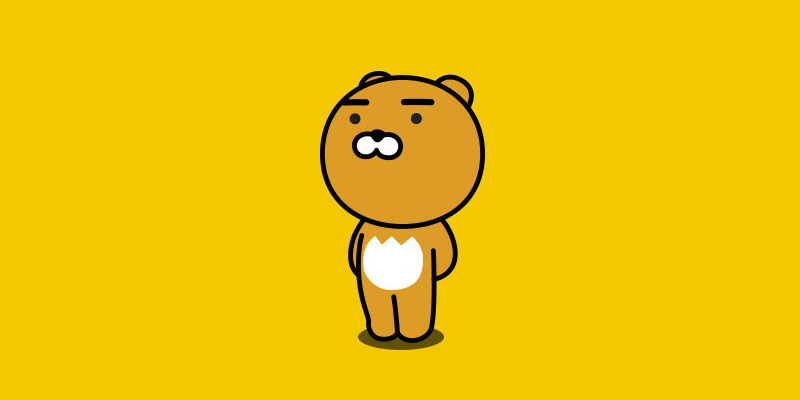

In [138]:
from PIL import Image
import requests

url = 'https://t1.daumcdn.net/cfile/tistory/2207573D58CFDE2704'
im = Image.open(requests.get(url, stream=True).raw)
im

In [139]:
im.save('image.jpeg')

In [140]:
# 이미지를 rb로 읽기

with open('image.jpeg', 'rb') as f:
    print(f.read(10))

b'\xff\xd8\xff\xe0\x00\x10JFIF'


In [127]:
import pickle

with open('test.dat', 'wb') as f:
    pickle.dump('hello world', f)

In [128]:
with open('test.dat', 'rb') as f:
    d = pickle.load(f)
    print(type(d))
    print(d)

<class 'str'>
hello world


_____________________

### buffering

buffering
- [What is buffering in python?](https://www.quora.com/What-is-buffering-in-python)
  - Buffering is a temporary storage area
  - The purpose of most buffers is to act as a holding area, enabling the CPU/system to manipulate data before transferring it to a device/user.
- 버퍼링끄기는 0(바이너리모드에서만 동작함)
- 라인모드는 1 (텍스트 모드에서만 가능), 고정 크기로 보내려면 임의의 바이트수를 1보다 큰 양의 수로 입력, 

기본 정책은 아래와 같습니다.
- 이진 파일은 고정 크기 청크로 버퍼링됩니다. 버퍼의 크기는 기본 장치의 "블록 크기"를 결정하고 다시 떨어지는 경험적 방법을 사용하여 선택됩니다 io.DEFAULT_BUFFER_SIZE. 많은 시스템에서 버퍼는 일반적으로 4096 또는 8192 바이트 길이입니다.
- "대화식"텍스트 파일 ( isatty() 반환 되는 파일 True)은 회선 버퍼링을 사용합니다. 다른 텍스트 파일은 바이너리 파일에 대해 위에서 설명한 정책을 사용합니다.

### encoding

encoding
- 파일을 디코딩하거나 인코딩하는 데 사용되는 인코딩의 이름입니다. 
- 텍스트 모드에서만 사용해야 합니다.
- 대부분 utf-8 이지만 모든 시스템이 utf-8이라는 보장이 없으므로 명시적으로 하는 것이 좋다.
- [파이썬에서 지원되는 인코딩 목록](https://docs.python.org/3.6/library/codecs.html)


문자와 인코딩
- 파이썬 뿐 아니라 모든 컴퓨터에서 문자는 2진 숫자의 열 즉, 바이트 열(byte sequence)로 바뀌어 저장된다. 이를 인코딩(encoding)이라고 하며 어떤 글자를 어떤 숫자로 바꿀지에 대한 규칙을 인코딩 방식이라고 한다.
- 가장 기본이 되는 인코딩 방식은 아스키(ASCII) 방식이다.

유니코드
- 인코딩 방식이 글자마다 혹은 회사마다 다르기 때문에 발생하는 문제를 해결하고자 <span style="color:red">유니코드</span>라는 것이 만들어졌다. 
- 유니코드에서는 다음과 같은 표준을 정했다.
  - 유니코드 코드 포인트 (unicode code point)
>유니코드 코드 포인트(code point) 최대 4바이트의 숫자로 전 세계 모든 글자를 대응시킨 것이다. 
  - 유니코드 인코딩 (UTF-8, UTF-16, UTF-32, ...)
> 유니코드 인코딩은 실제로 유니코드 문자를 바이트 열로 바꾸어 파일 등에 저장할 때 사용되는 방식으로 영문 알파벳에 대해 ASCII 인코딩 방식과 호환하며 크기, 정렬 등의 문제를 고려하여 설계되었다.
- 파이썬 내부에서 문자를 메모리에 저장할 때 기본적으로는 유니코드 코드 포인트를 사용한다.
- **UTF-8은 현재 가장 많이 사용되는 유니코드 인코딩 방식의 하나이다.**

In [66]:
# 유니코드를 바이트 열로 변환할 때는 인코드 encode 메서드 사용


u = '가나다'
print(type(u))
print(u)

print('--------------')

b1 = u.encode("cp949")
print(type(b1))
print(b1)

print('--------------')

b2 = u.encode("utf-8")
print(type(b2))
print(b2)

<class 'str'>
가나다
--------------
<class 'bytes'>
b'\xb0\xa1\xb3\xaa\xb4\xd9'
--------------
<class 'bytes'>
b'\xea\xb0\x80\xeb\x82\x98\xeb\x8b\xa4'


In [68]:
# 바이트 열을 유니코드로 변환할 때는 디코드 decode 메서드 사용

print(b1.decode("cp949"))

print(b2.decode("utf-8"))

가나다
가나다


In [69]:
# 반대로 사용 한다면...?

print(b1.decode("utf-8"))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 0: invalid start byte

In [70]:
print(b2.decode("cp949"))

UnicodeDecodeError: 'cp949' codec can't decode byte 0x80 in position 2: illegal multibyte sequence


### errors

errors 는 인코딩 및 디코딩 에러를 처리하는 방법을 지정하는 선택적 문자열입니다. 
- 바이너리 모드에서는 사용할 수 없습니다. 다양한 표준 에러 처리기가 제공됩니다
  - 'strict' 는 인코딩 에러가 있는 경우 ValueError 예외를 발생시킵니다. 기본값 None 은 같은 효과를 냅니다.
  - 'ignore' 는 에러를 무시합니다. 인코딩 에러를 무시하면 데이터가 손실될 수 있음에 주의하세요.
  - 'replace' 는 잘못된 데이터가 있는 자리에 대체 마커('?' 와 같은)를 삽입합니다.
  - 그 밖에 다른 사안은 [Error Handlers](https://docs.python.org/ko/3/library/codecs.html#error-handlers)를 참고해주세요.

### newline

universal newlines (유니버설 줄 넘김)의 작동 방식을 제어
- 텍스트 모드만 적용
- 스트림에서 입력을 읽을 때, newline 이 None 이면, 유니버설 줄 넘김 모드가 활성화
- 윈도우즈의 경우 csv 모듈에서 데이타를 쓸 때 각 라인 뒤에 빈 라인이 추가되는 문제가 있는데, 이를 없애기 위해 (파이썬 3 에서) 파일을 open 할 때 newline='' 와 같은 옵션을 지정

In [105]:
import csv    
f = open('output.csv', 'w', encoding='utf-8', newline='')
wr = csv.writer(f)
wr.writerow([1, "김정수", False])
wr.writerow([2, "박상미", True])
f.close()